## Import dataset with pandas


In [182]:
import pandas
import numpy as np
from scipy.io import arff

dataset = arff.loadarff('ames_housing.arff')
data = pandas.DataFrame(dataset[0])
data.columns

print(data.Sale_Price.min(),data.Sale_Price.max())


12789.0 755000.0


In [177]:
def refineData(df):
    replace_kitch = {"Kitchen_Qual":{b'Poor': 0, b'Fair': 1, b'Typical': 2, b'Good': 3, b'Excellent': 4},"Utilities":{b'AllPub': 1, b'NoSewr': 2, b'NoSeWa':3}, "Land_Slope": {b'Gtl': 1, b'Mod': 2, b'Sev': 3}}
    data = df.replace(replace_kitch)
    return data

data = refineData(data)
data.describe()
data.head()

print(data.Land_Slope.value_counts())

1    2789
2     125
3      16
Name: Land_Slope, dtype: int64


## Controllo features

Andiamo a vedere le caratteristiche di alcune feature.

In [168]:
for i in data.loc[:, ~data.columns.isin(data._get_numeric_data())]:
    print()
    print(data[i].value_counts())



b'One_Story_1946_and_Newer_All_Styles'          1079
b'Two_Story_1946_and_Newer'                      575
b'One_and_Half_Story_Finished_All_Ages'          287
b'One_Story_PUD_1946_and_Newer'                  192
b'One_Story_1945_and_Older'                      139
b'Two_Story_PUD_1946_and_Newer'                  129
b'Two_Story_1945_and_Older'                      128
b'Split_or_Multilevel'                           118
b'Duplex_All_Styles_and_Ages'                    109
b'Two_Family_conversion_All_Styles_and_Ages'      61
b'Split_Foyer'                                    48
b'Two_and_Half_Story_All_Ages'                    23
b'One_and_Half_Story_Unfinished_All_Ages'         18
b'PUD_Multilevel_Split_Level_Foyer'               17
b'One_Story_with_Finished_Attic_All_Ages'          6
b'One_and_Half_Story_PUD_All_Ages'                 1
Name: MS_SubClass, dtype: int64

b'Residential_Low_Density'         2273
b'Residential_Medium_Density'       462
b'Floating_Village_Residential'     13

In [169]:
for i in data.loc[:, ~data.columns.isin(data._get_numeric_data())]:
    if data[i].value_counts()[0] * 100 / len(data[i]) >= 95:
        print(i)

Street
Land_Slope
Condition_2
Roof_Matl
Heating
Pool_QC
Misc_Feature


count        2930
unique          6
top       b'None'
freq         2824
Name: Misc_Feature, dtype: object

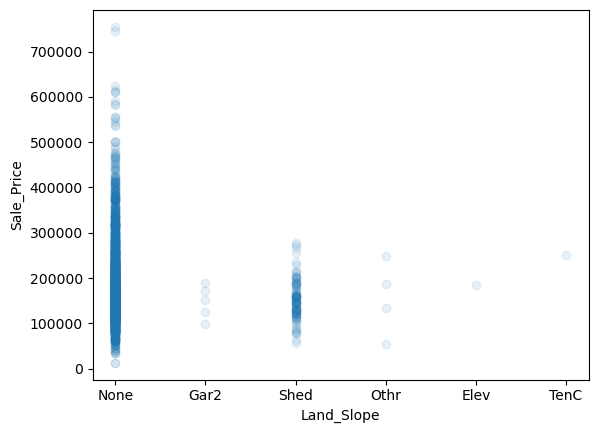

In [185]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots()

axs.plot(data.Misc_Feature, data['Sale_Price'], 'o', alpha=0.1)
axs.set_xlabel('Land_Slope')
axs.set_ylabel('Sale_Price')

data.Misc_Feature.describe()

La feature "Street" non ha una distribuzione uniforme tra le varie classi e non va ha un prezzo interessante rispetto a quello di "Pave", quindi non ha un buon valore predittivo.
La feature "Utilities" non ha una distribuzione uniforme tra le varie classi e non va ha un prezzo interessante rispetto a quello di "Pave", quindi non ha un buon valore predittivo.

Andiamo momentaneamente ad escludere le feature:
Street
Utilities
Land_Slope
Condition_2
Roof_Matl
Heating
Pool_QC
Misc_Feature

In quanto il 95% delle istanze cadono nello stesso valore della feature

  (0, 7)	1.0
  (1, 0)	1.0
  (2, 5)	1.0
  (3, 8)	1.0
  (4, 6)	1.0
  (5, 6)	1.0
  (6, 7)	1.0
  (7, 6)	1.0
  (8, 8)	1.0
  (9, 6)	1.0
  (10, 5)	1.0
  (11, 6)	1.0
  (12, 6)	1.0
  (13, 5)	1.0
  (14, 7)	1.0
  (15, 9)	1.0
  (16, 5)	1.0
  (17, 9)	1.0
  (18, 3)	1.0
  (19, 7)	1.0
  (20, 6)	1.0
  (21, 5)	1.0
  (22, 7)	1.0
  (23, 4)	1.0
  (24, 4)	1.0
  :	:
  (2905, 5)	1.0
  (2906, 4)	1.0
  (2907, 0)	1.0
  (2908, 0)	1.0
  (2909, 2)	1.0
  (2910, 4)	1.0
  (2911, 2)	1.0
  (2912, 4)	1.0
  (2913, 0)	1.0
  (2914, 0)	1.0
  (2915, 3)	1.0
  (2916, 0)	1.0
  (2917, 0)	1.0
  (2918, 0)	1.0
  (2919, 0)	1.0
  (2920, 0)	1.0
  (2921, 4)	1.0
  (2922, 6)	1.0
  (2923, 5)	1.0
  (2924, 2)	1.0
  (2925, 3)	1.0
  (2926, 2)	1.0
  (2927, 2)	1.0
  (2928, 5)	1.0
  (2929, 6)	1.0


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([2929.5, 2929.6, 2929.7, 2929.8, 2929.9, 2930. , 2930.1, 2930.2,
        2930.3, 2930.4, 2930.5]),
 <BarContainer object of 10 artists>)

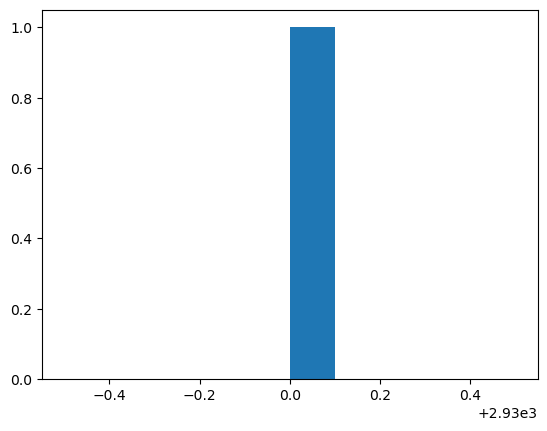

In [211]:
from sklearn.preprocessing import KBinsDiscretizer

Y = data['Sale_Price'].to_numpy()
Y = Y.reshape(-1,1)

enc = KBinsDiscretizer(n_bins=10, encode="onehot")
Y_binned = enc.fit_transform(Y)

print(Y_binned)



fig, axs = plt.subplots()

plt.hist(Y_binned.getnnz())

#data.describe()



## Plotting

Text(0, 0.5, 'Kitchen_Qual')

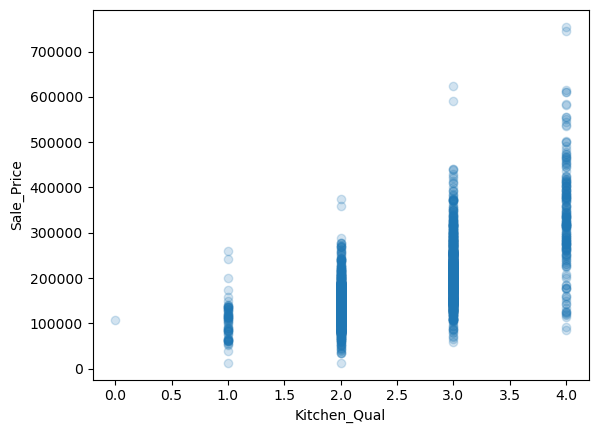

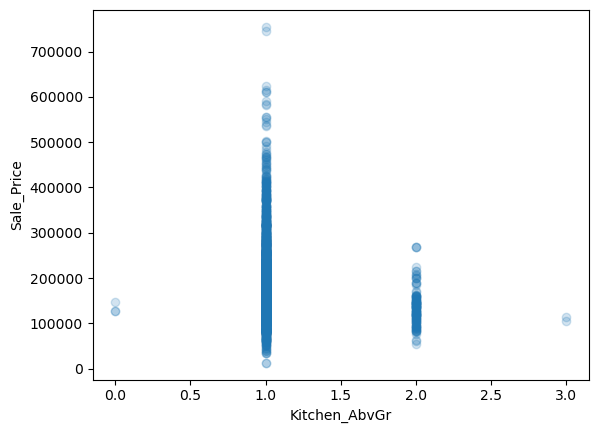

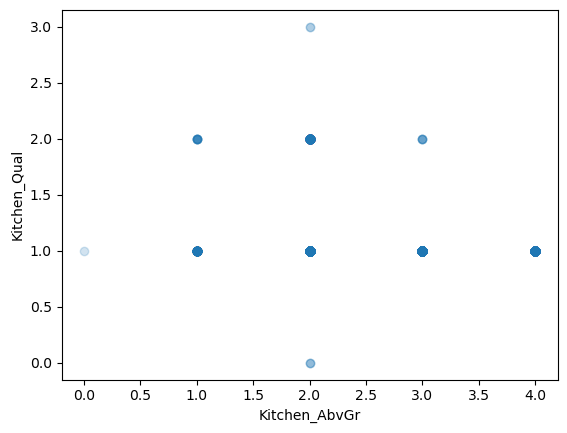

In [171]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots()

axs.plot(data.Kitchen_Qual, data['Sale_Price'], 'o', alpha=0.2)
axs.set_xlabel('Kitchen_Qual')
axs.set_ylabel('Sale_Price')
#plt.savefig('./plots/books_read.png')

fig, axs = plt.subplots()

axs.plot(data.Kitchen_AbvGr, data['Sale_Price'], 'o', alpha=0.2)
axs.set_xlabel('Kitchen_AbvGr')
axs.set_ylabel('Sale_Price')

fig, axs = plt.subplots()

axs.plot(data.Kitchen_Qual, data['Kitchen_AbvGr'], 'o', alpha=0.2)
axs.set_xlabel('Kitchen_AbvGr')
axs.set_ylabel('Kitchen_Qual')

C:\Users\ricca\AppData\Local\Temp\ipykernel_21340\4261430004.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots()


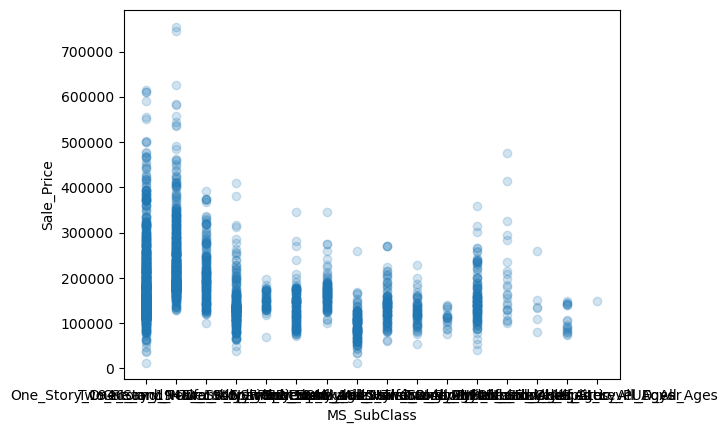

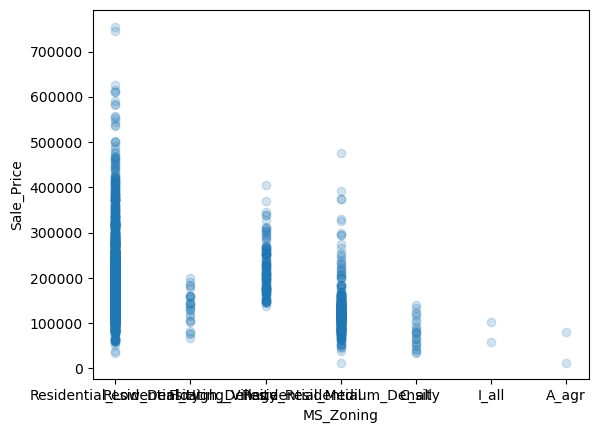

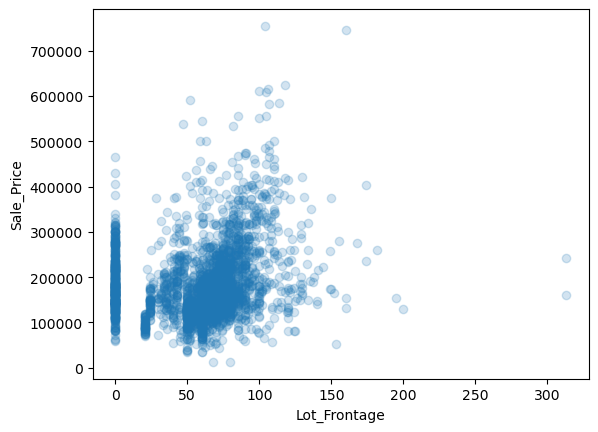

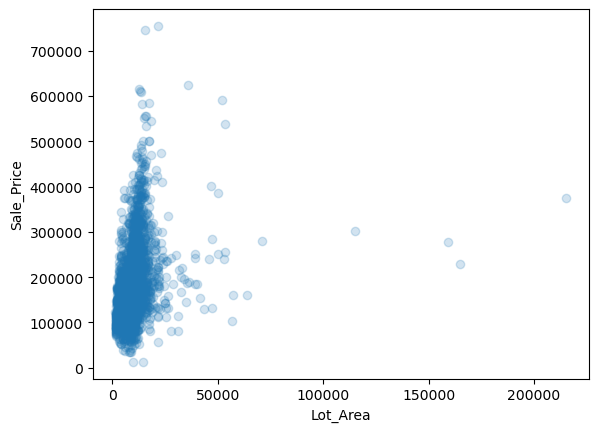

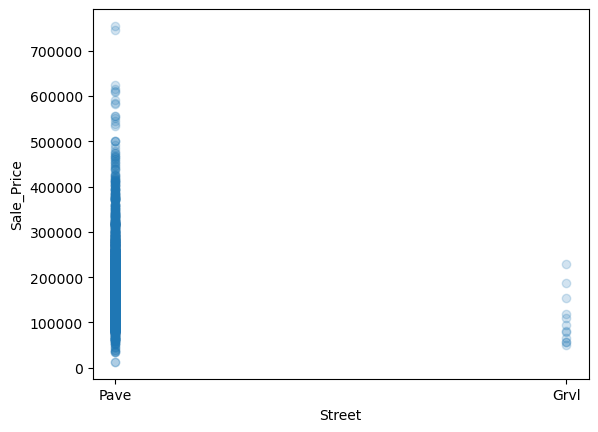

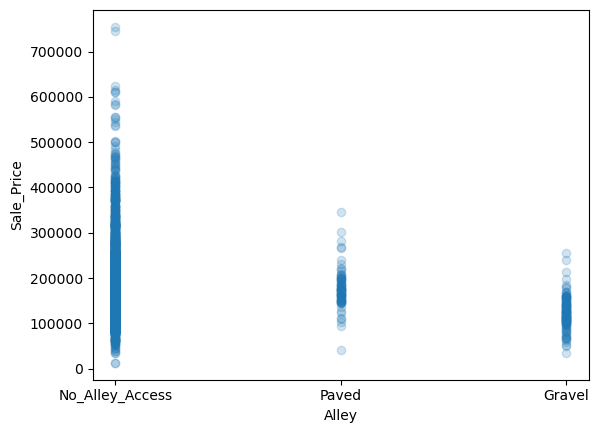

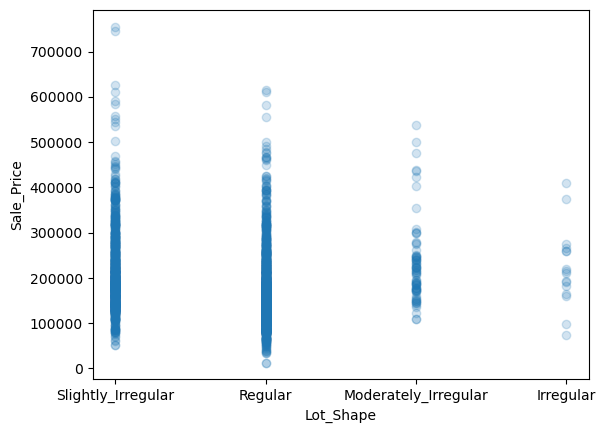

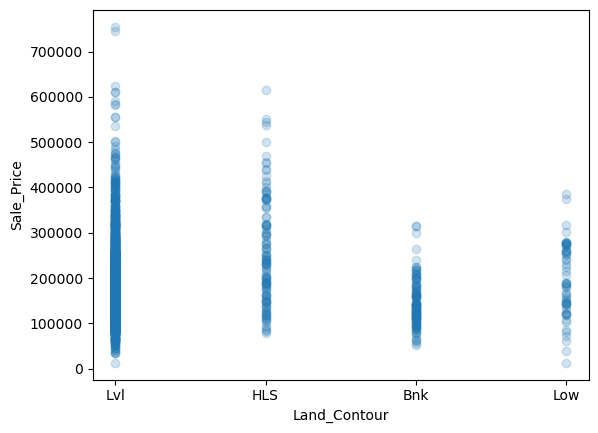

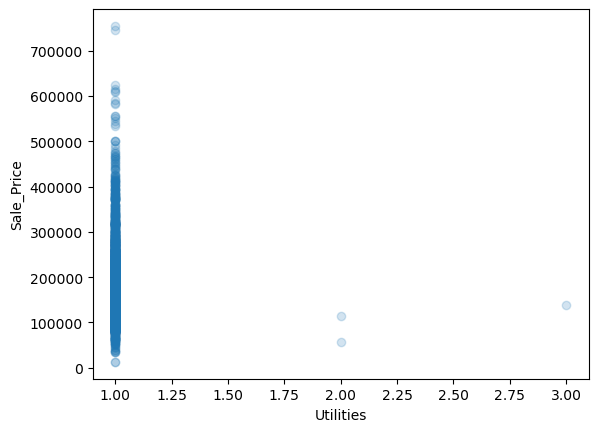

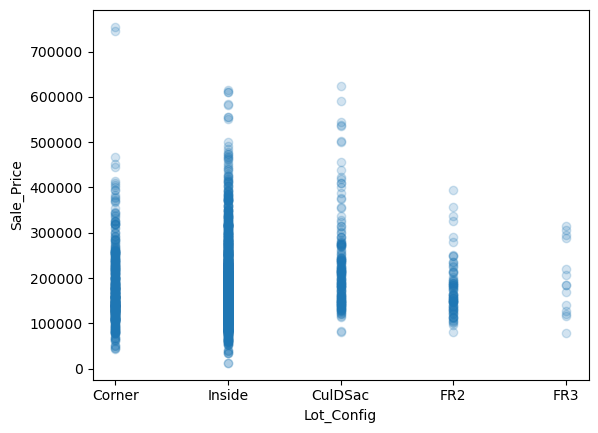

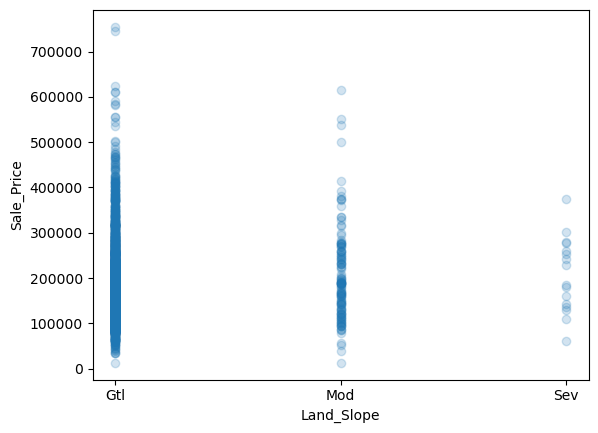

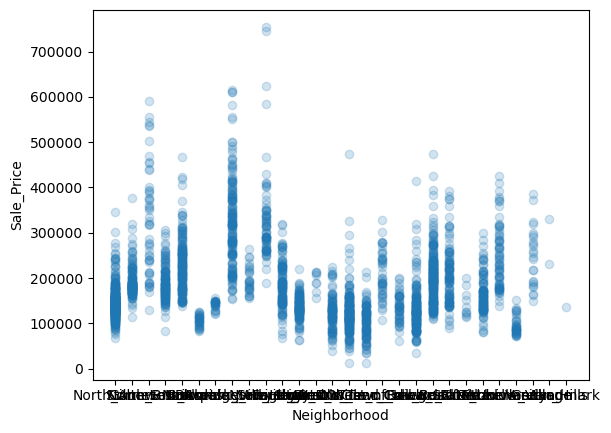

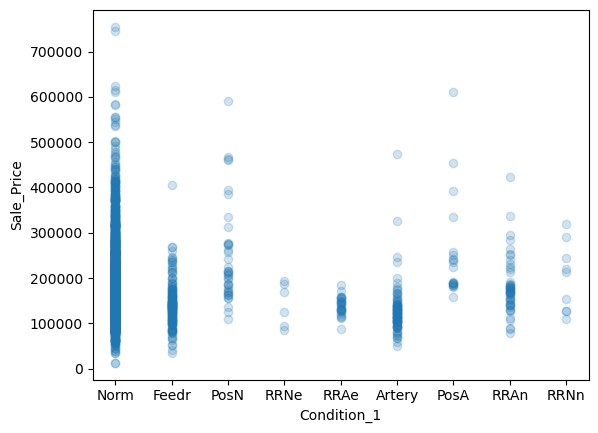

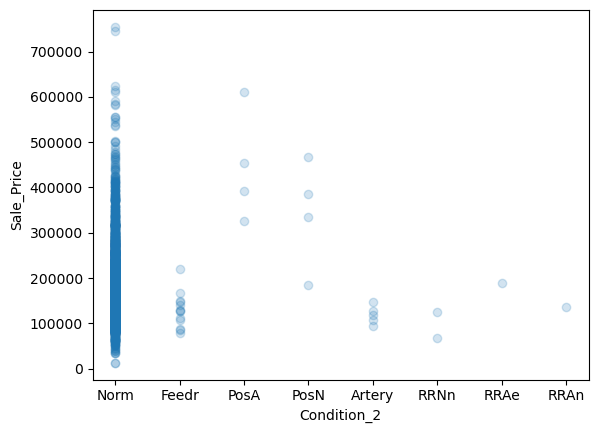

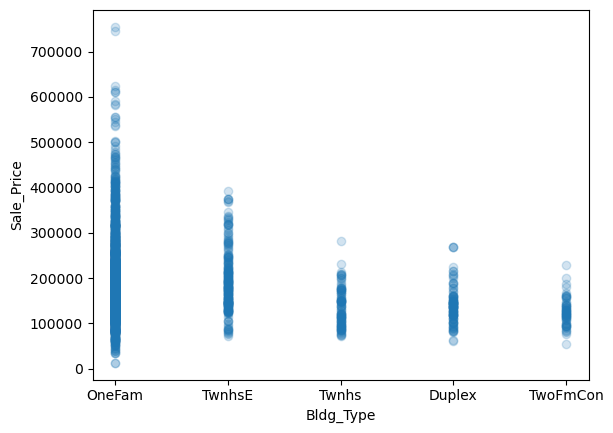

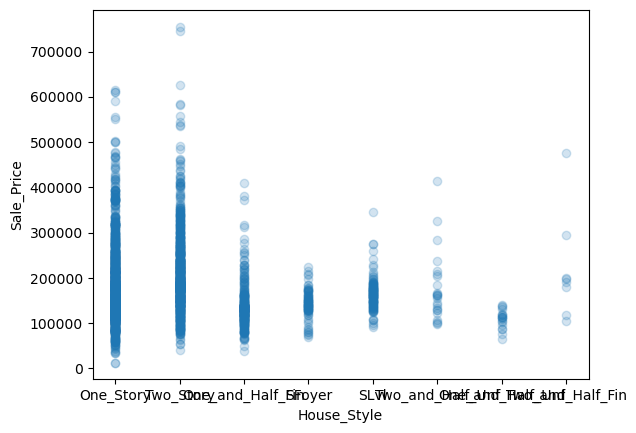

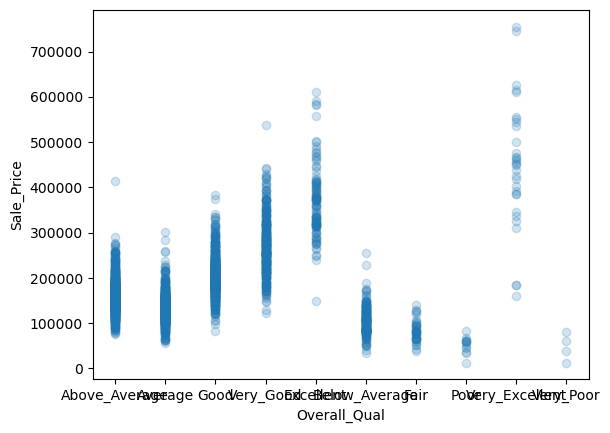

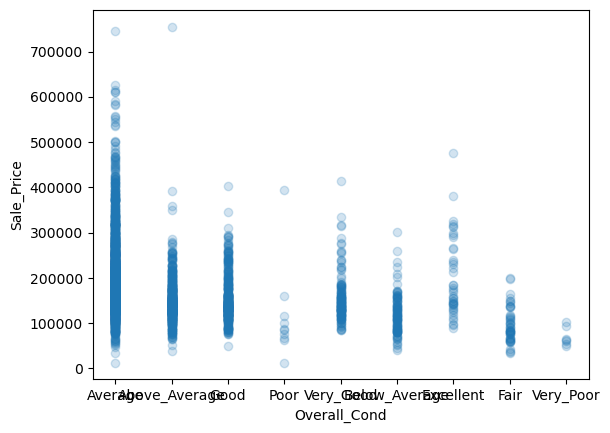

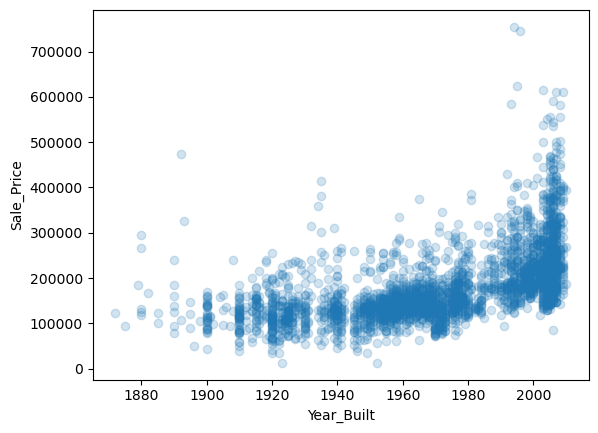

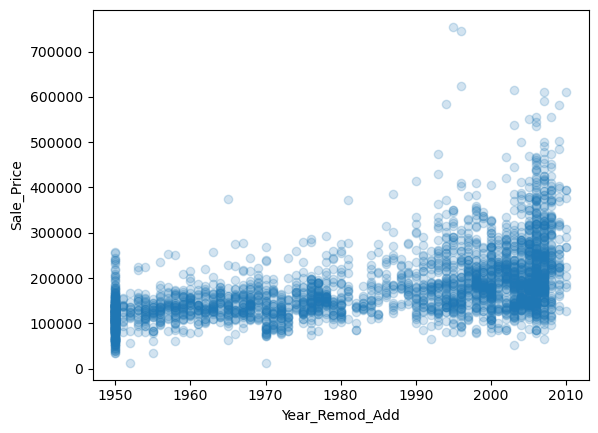

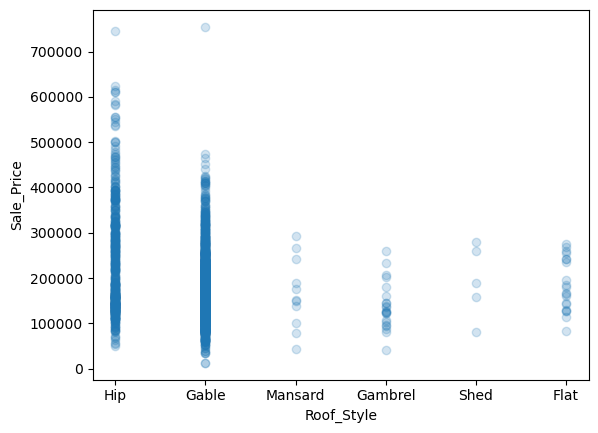

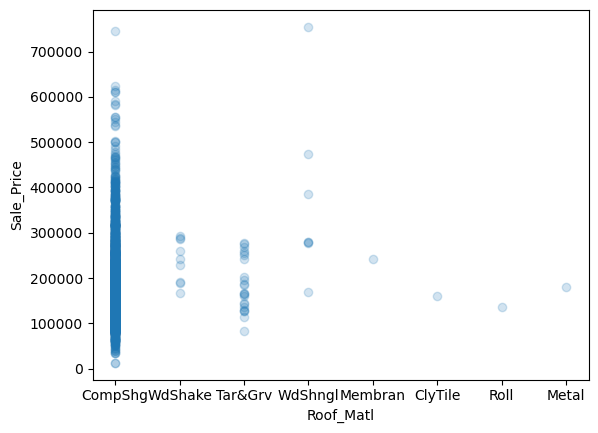

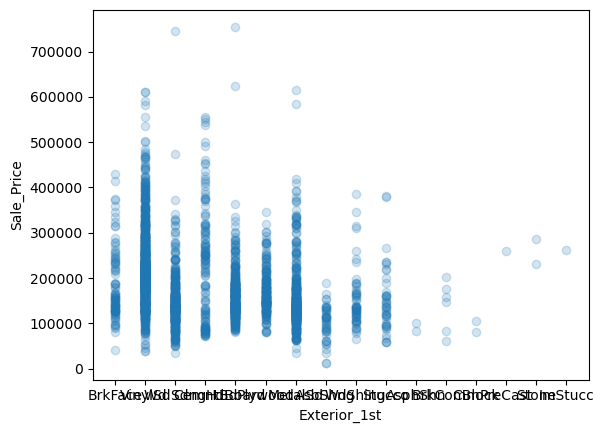

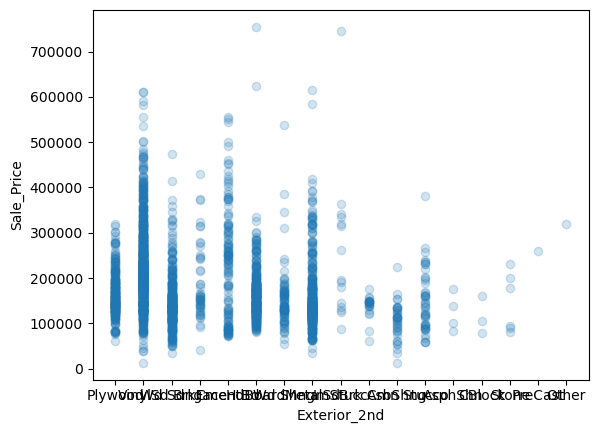

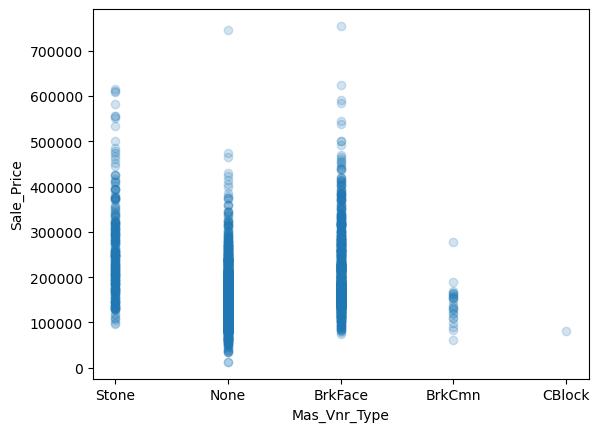

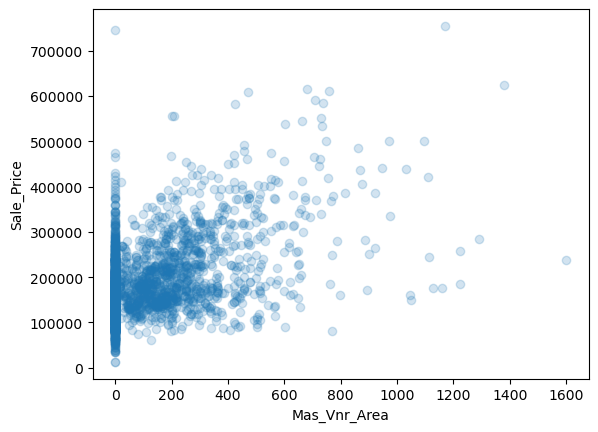

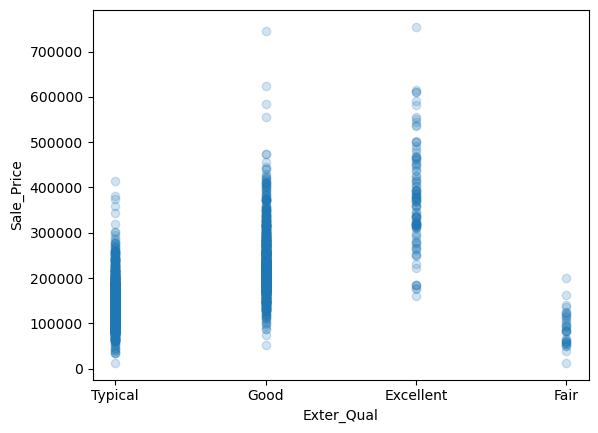

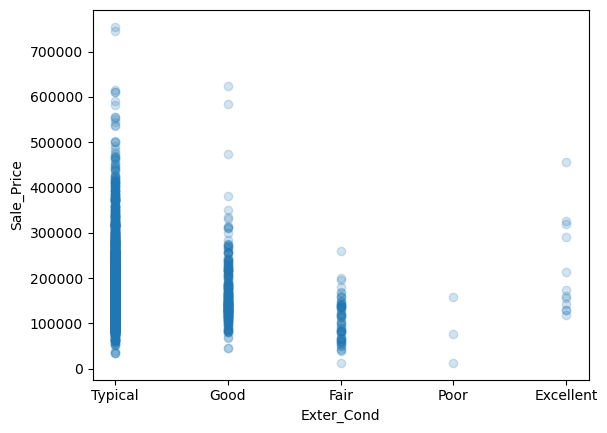

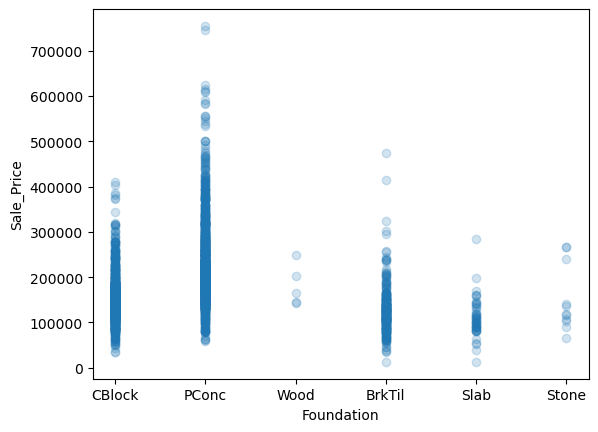

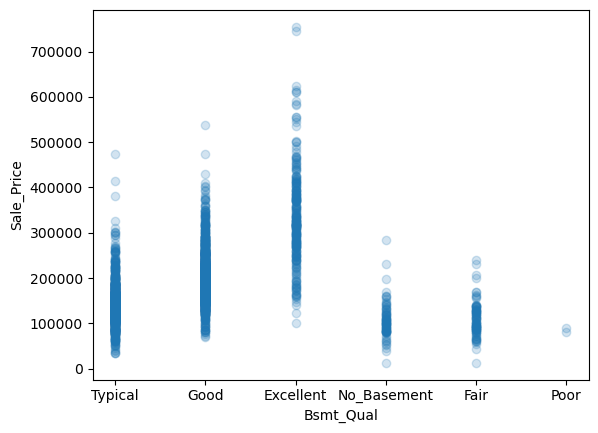

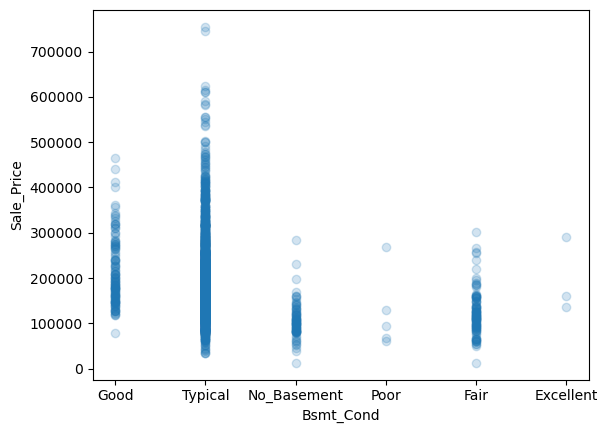

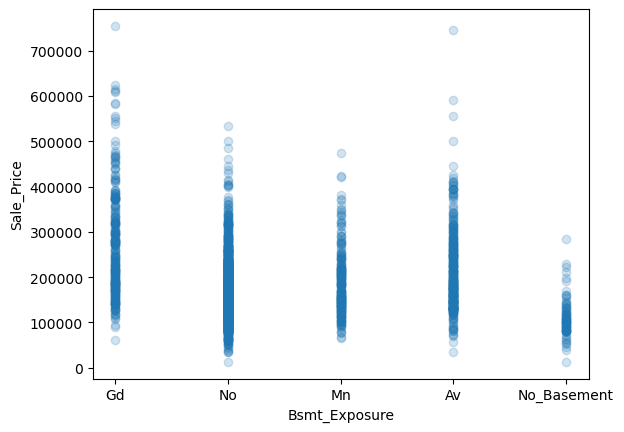

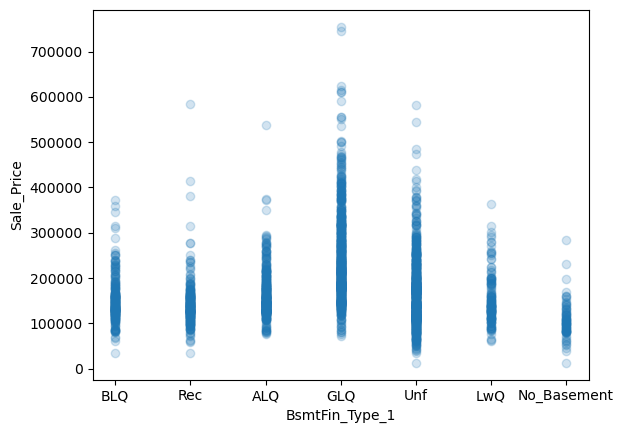

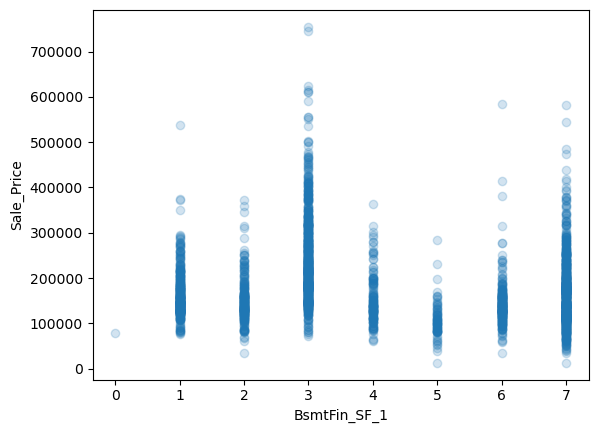

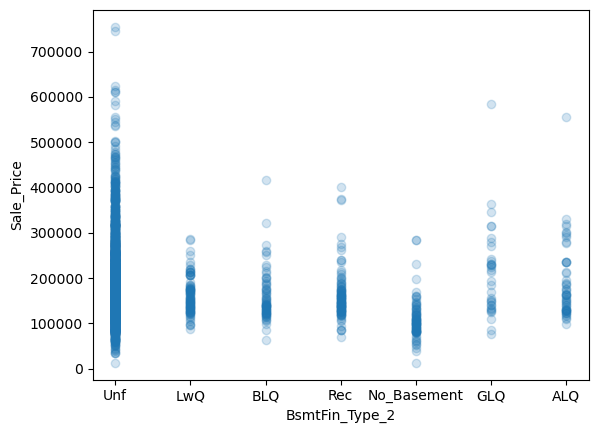

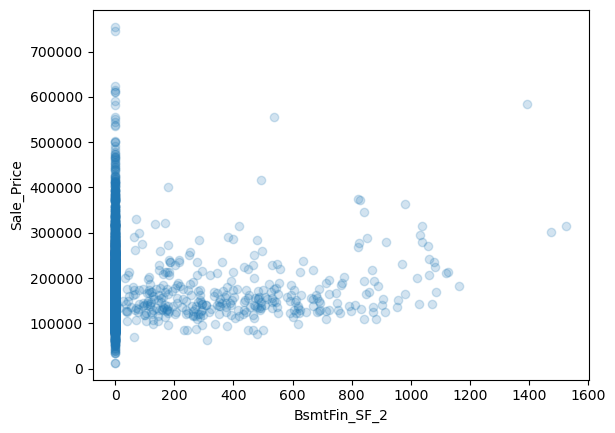

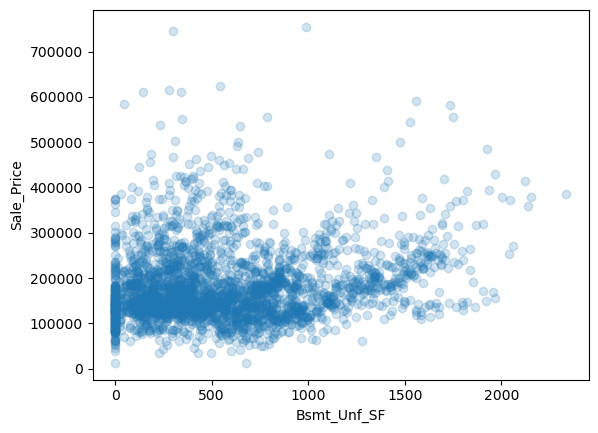

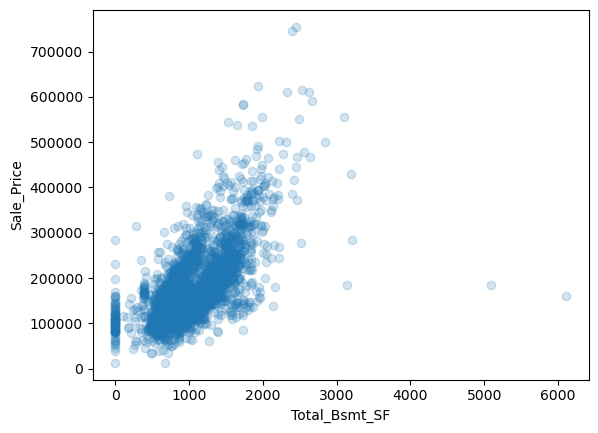

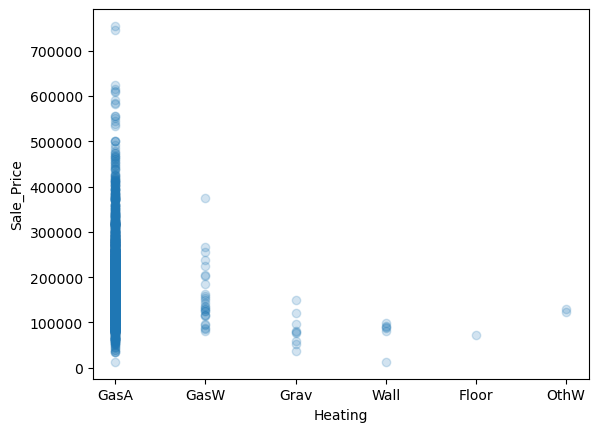

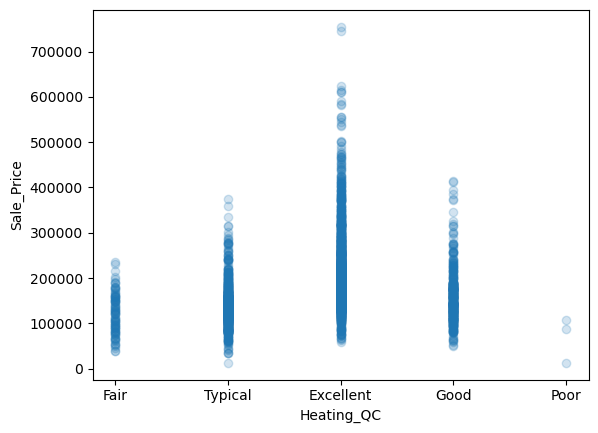

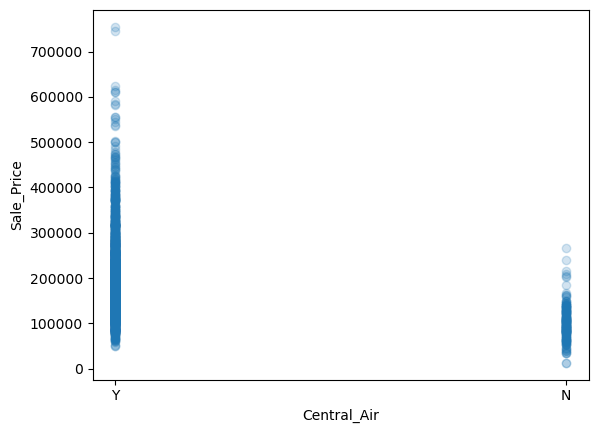

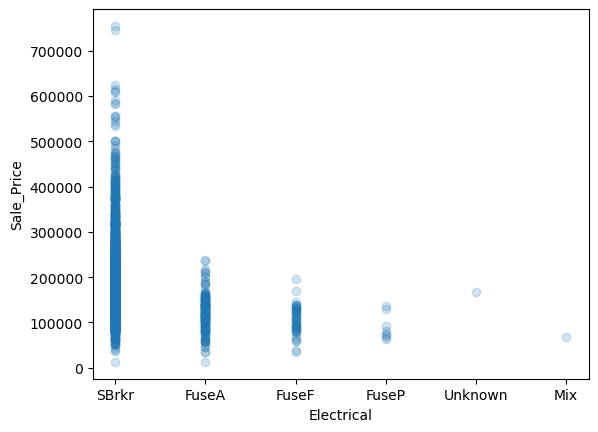

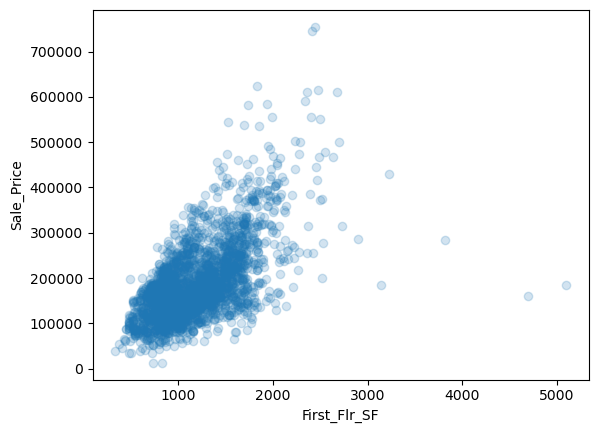

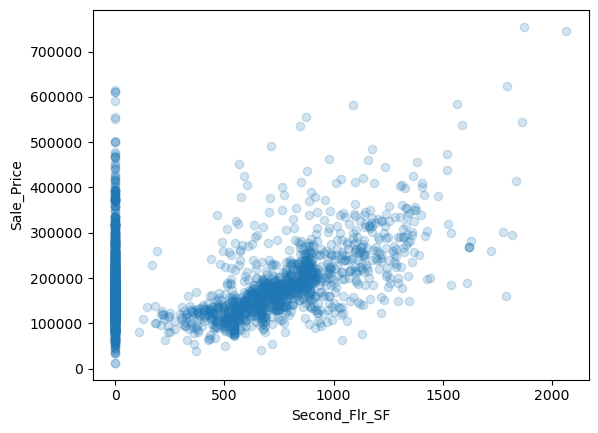

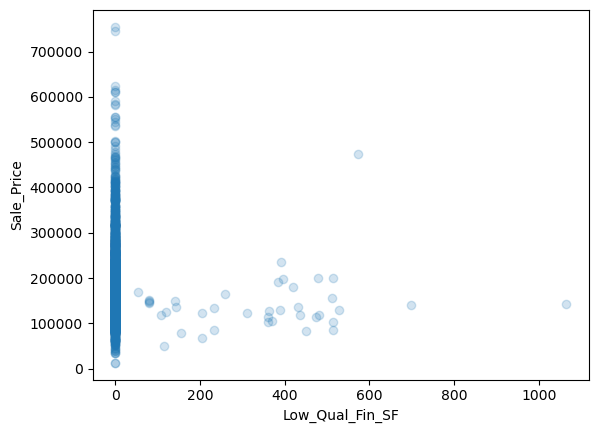

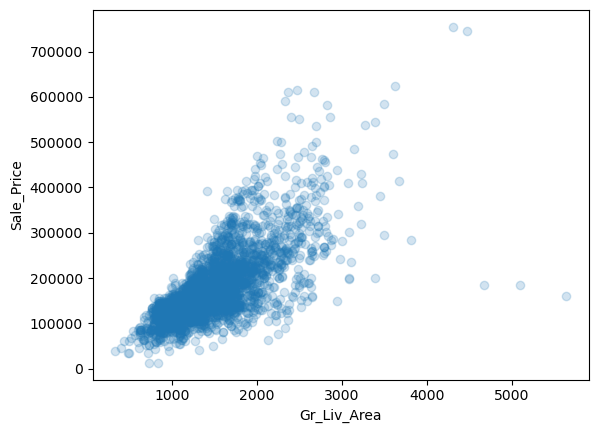

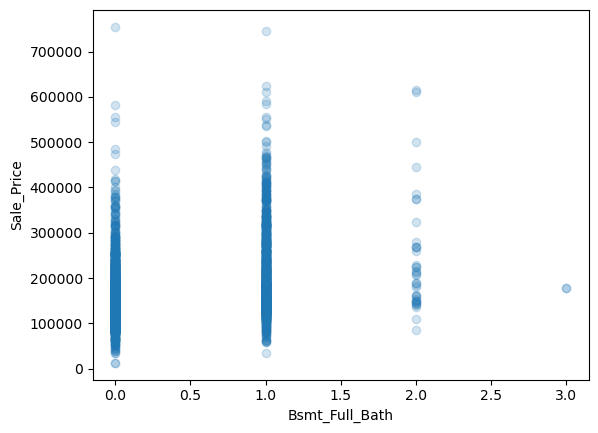

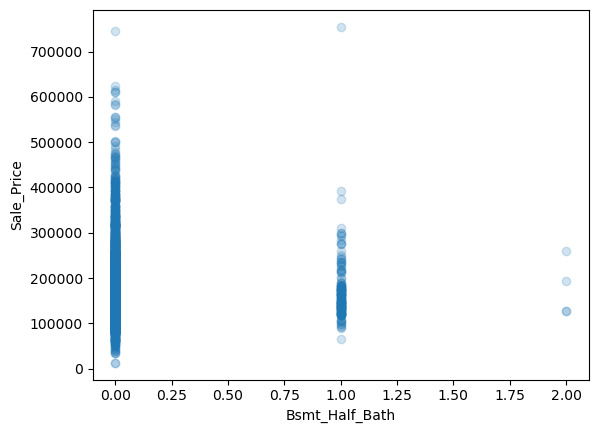

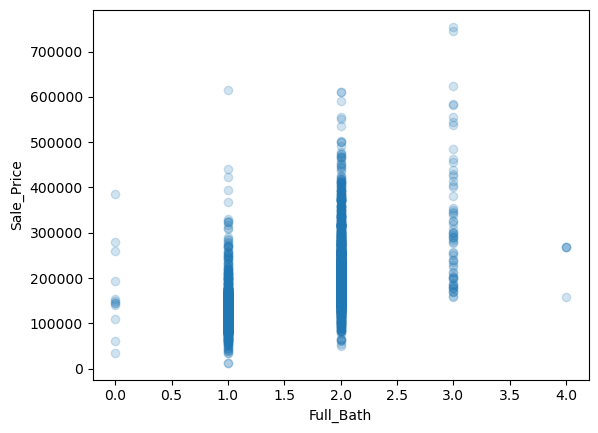

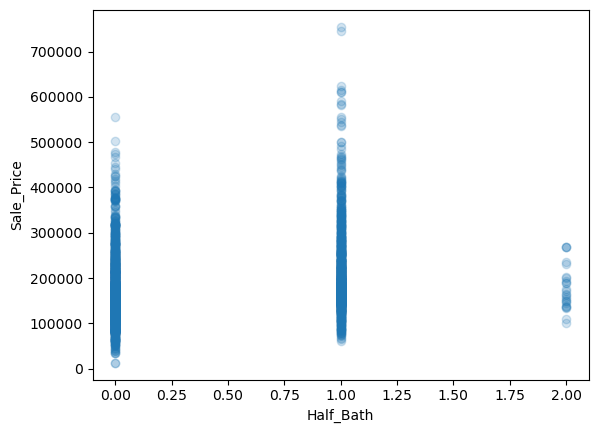

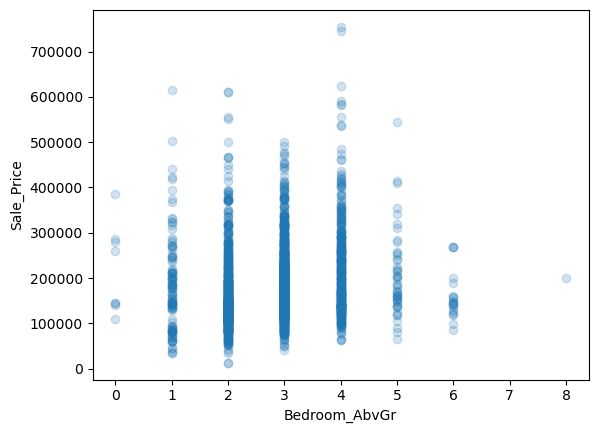

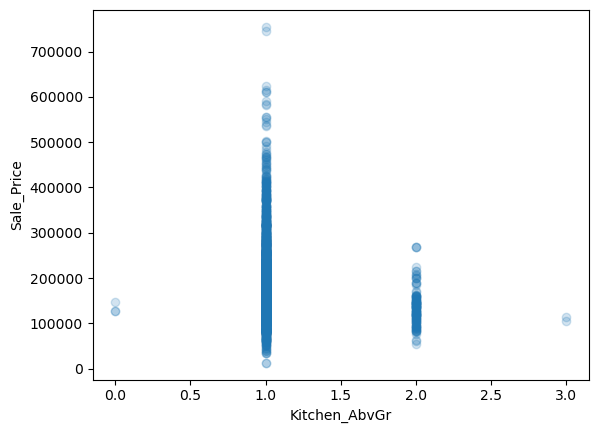

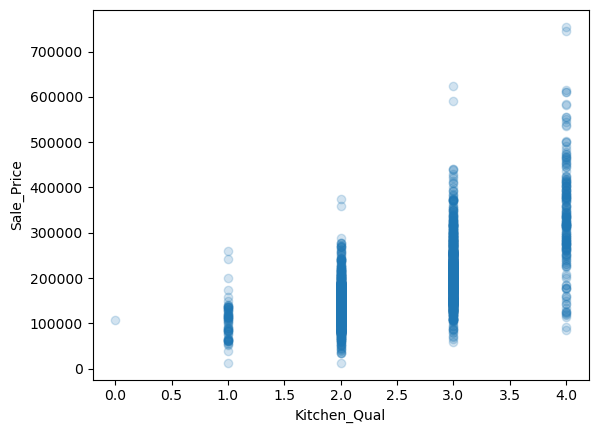

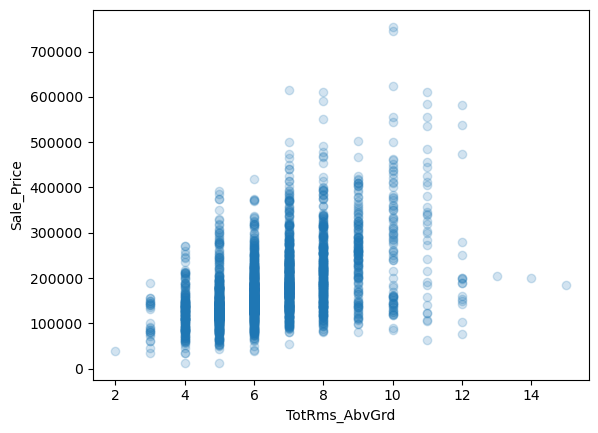

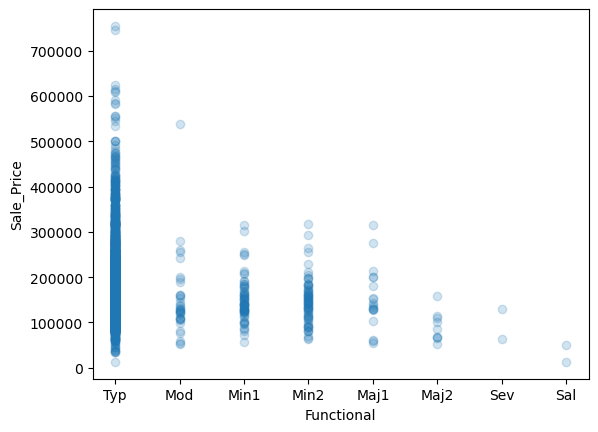

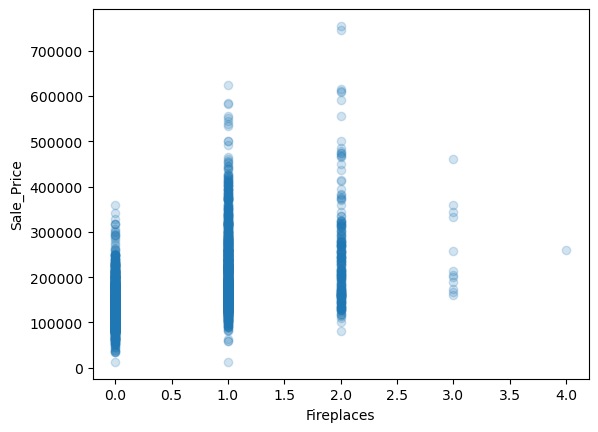

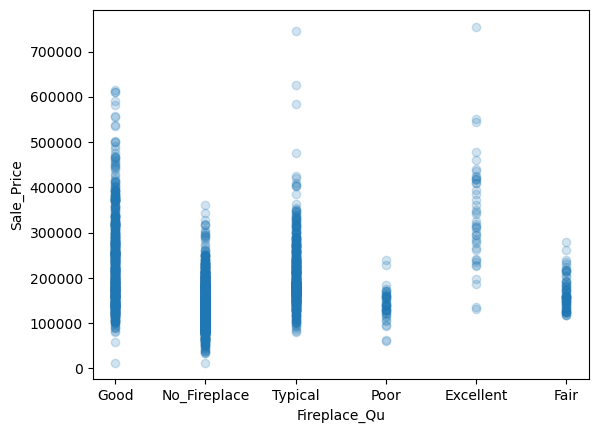

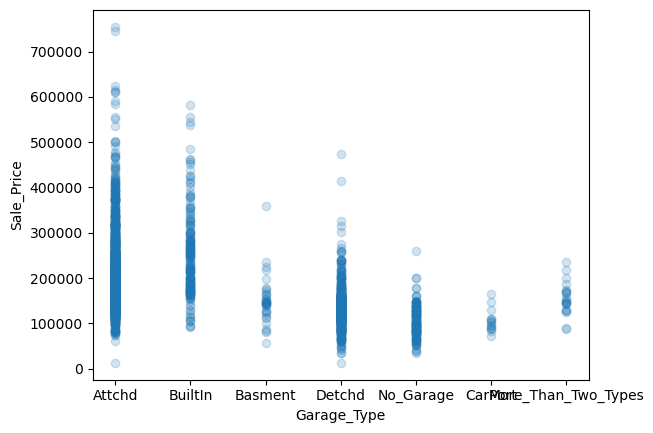

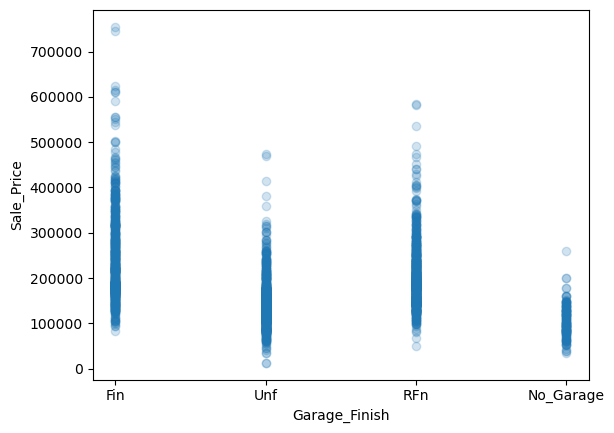

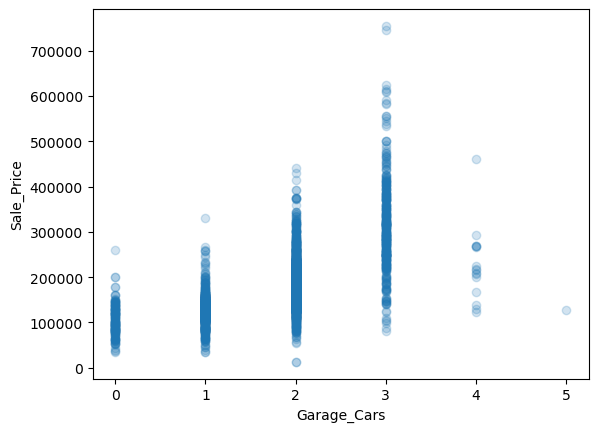

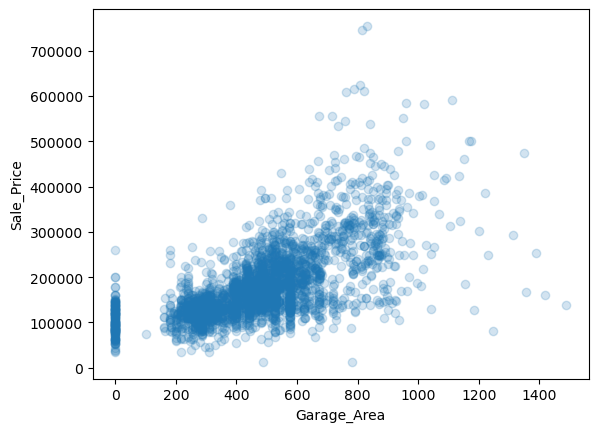

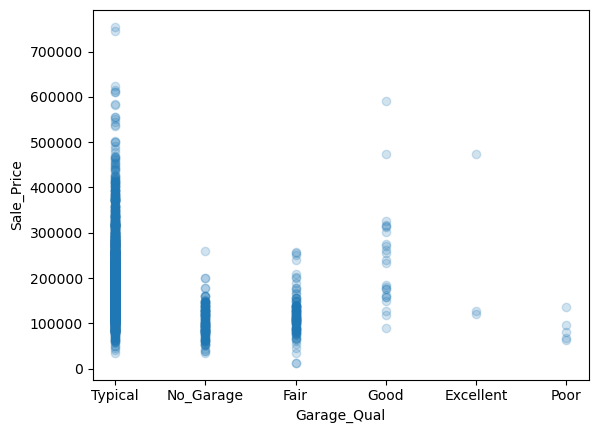

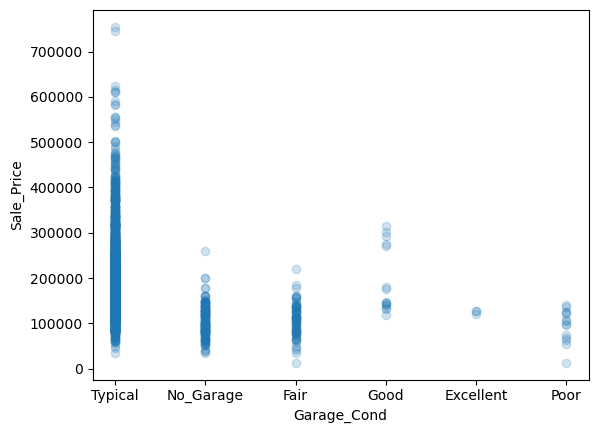

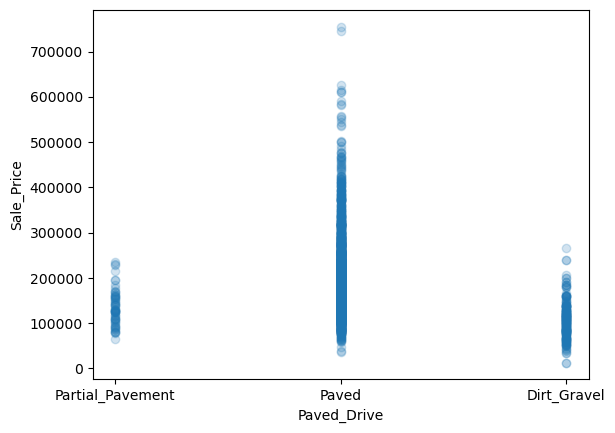

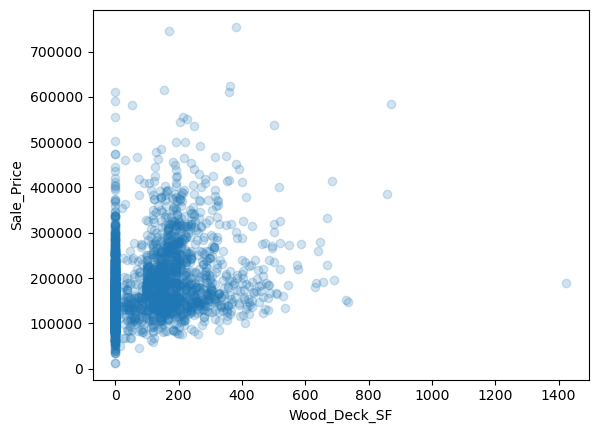

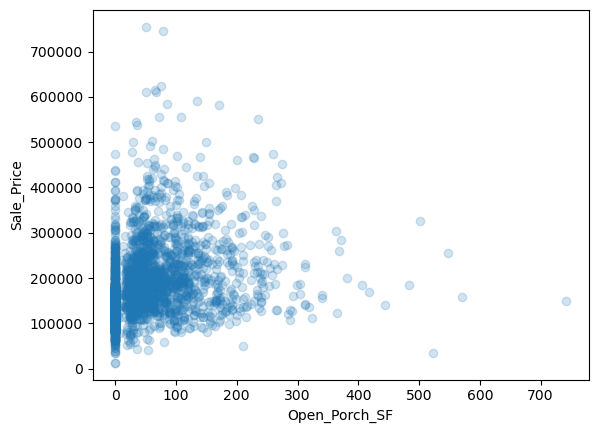

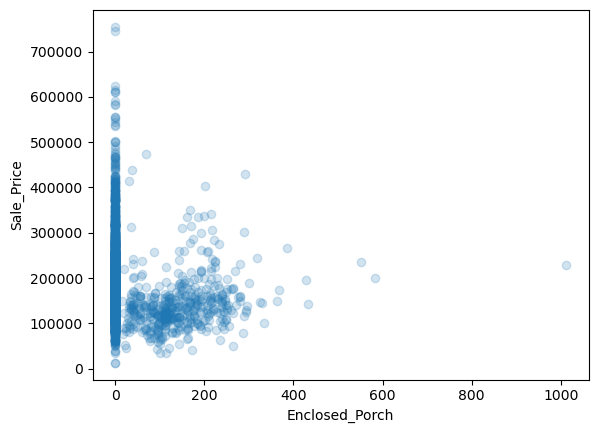

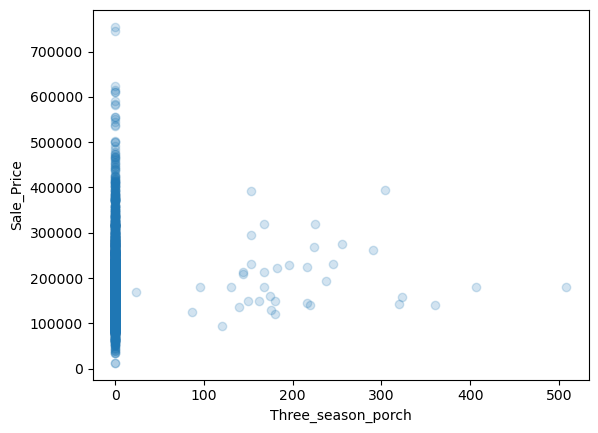

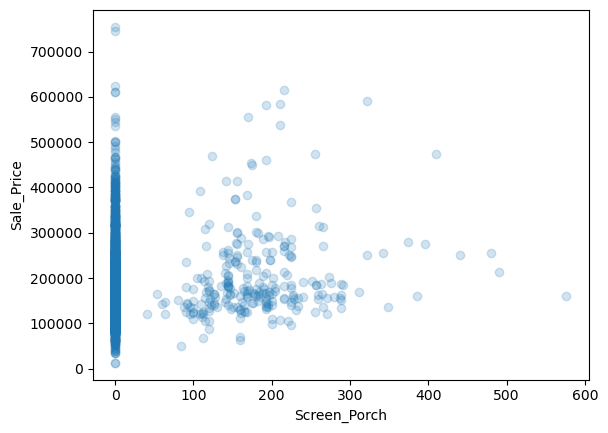

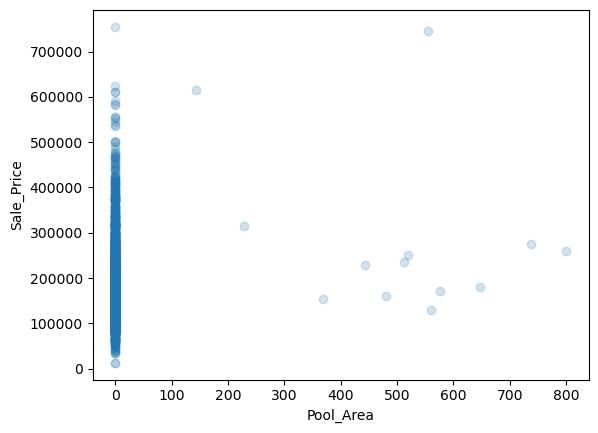

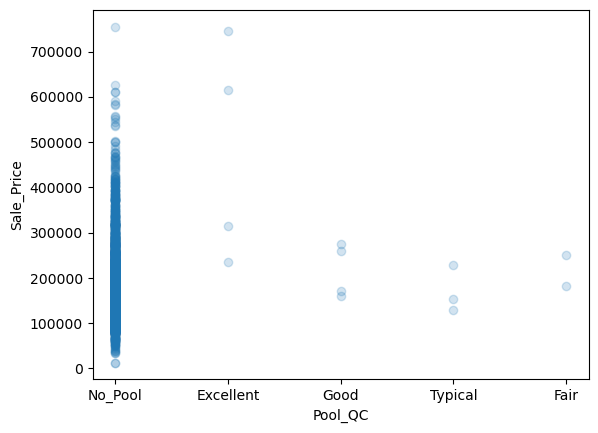

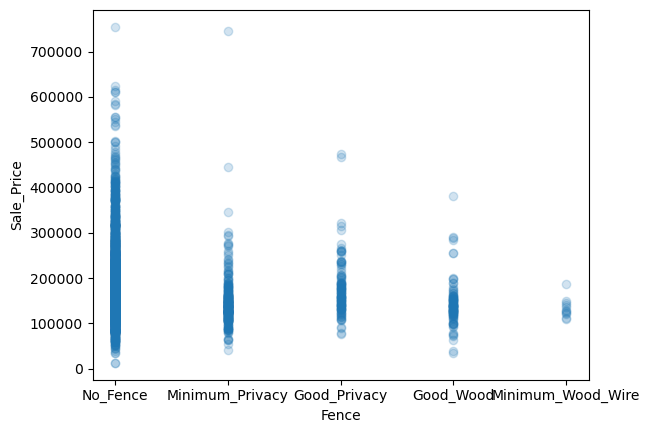

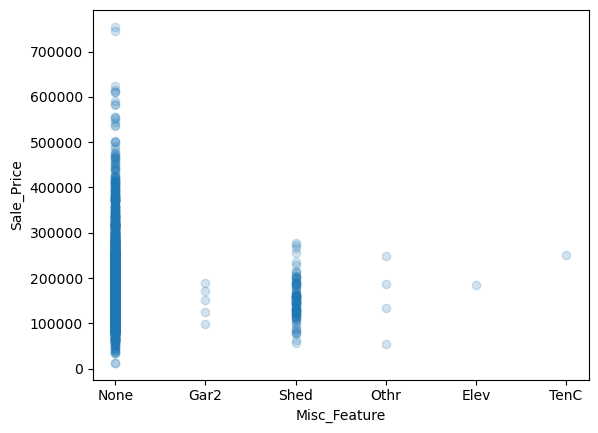

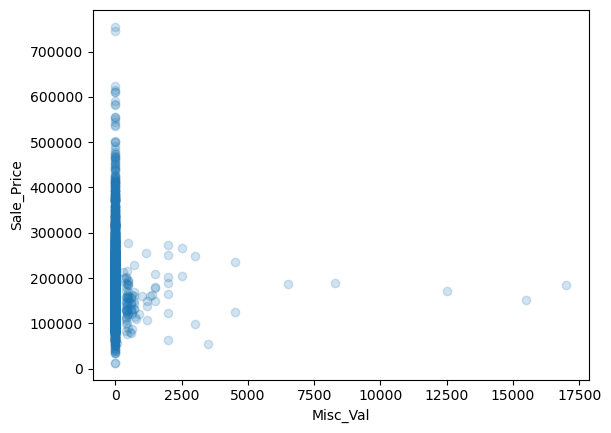

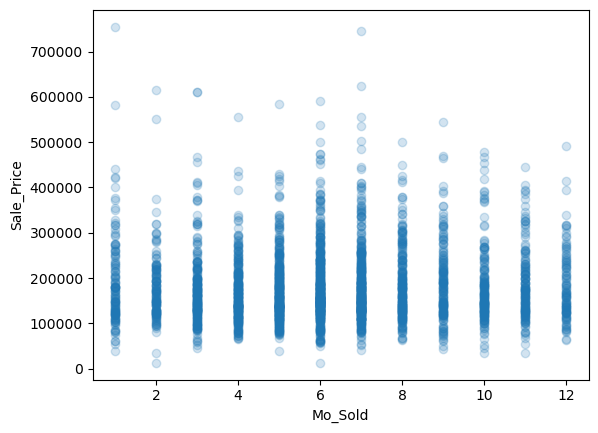

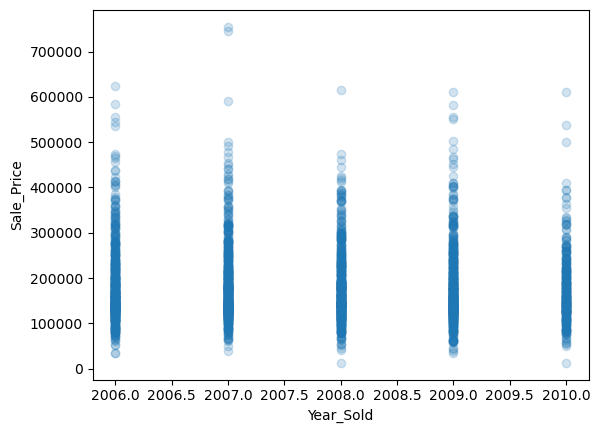

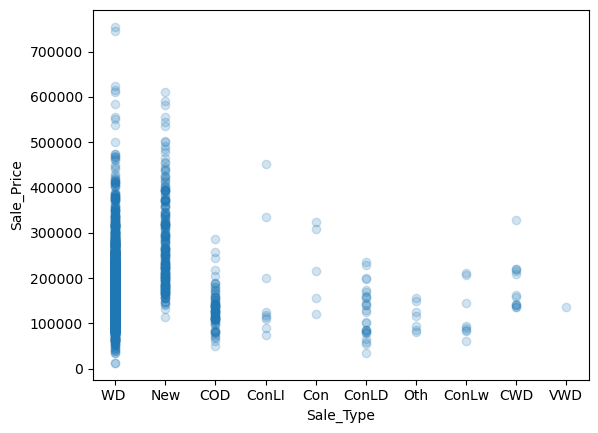

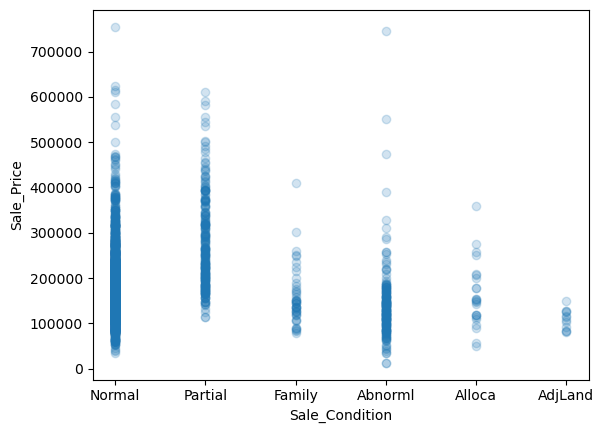

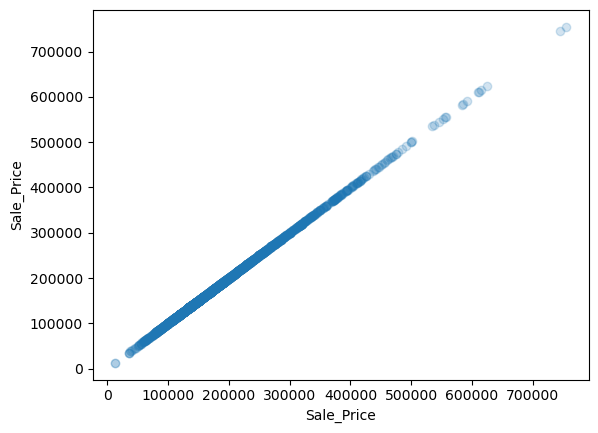

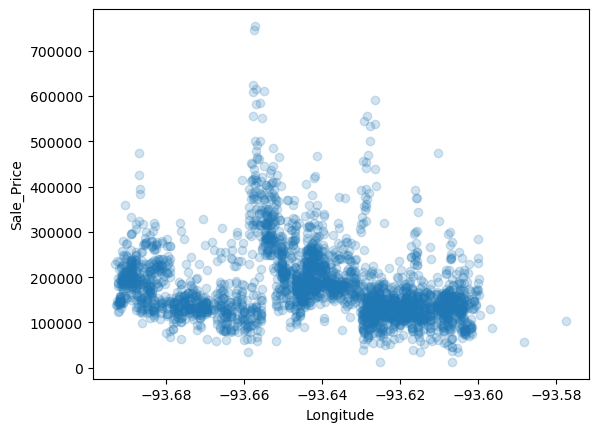

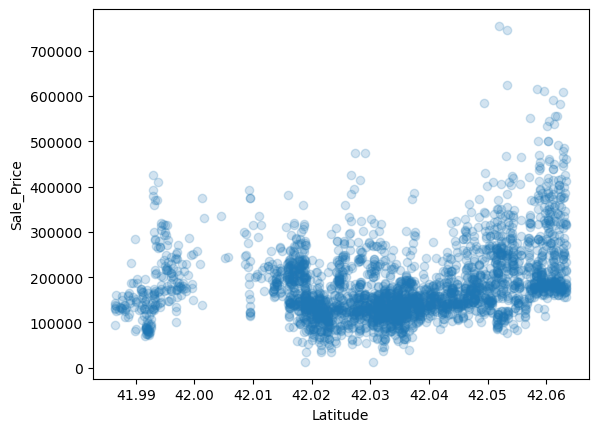

In [172]:
import matplotlib.pyplot as plt

for index, i in enumerate(data.columns):
    fig, axs = plt.subplots()
    axs.plot(data[i], data['Sale_Price'], 'o', alpha=0.2)
    axs.set_xlabel(i)
    axs.set_ylabel('Sale_Price')


# Decision trees
> Applicazione dei decision tre al dataset

In [173]:
import pandas
from scipy.io import arff
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dataset = arff.loadarff('ames_housing.arff')
data = pandas.DataFrame(dataset[0])

X = data._get_numeric_data()
X = X.loc[:, ~X.columns.isin(
    ['Sale_Price', 'Longitude', 'Latitude', 'TotRms_AbvGrd'])]
X = X.loc[:, ~X.columns.isin(
    [col for col in X if len(X[col].value_counts()) < 13])]

y = data['Sale_Price']

# split dataset in train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

errors = []

for max_leaves in range(5, 600):
    # train and predict
    dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:, 0], errors[:, 1], "o-", label="DT Train", alpha=0.3)
ax.plot(errors[:, 0], errors[:, 2], "o-", label="DT Test", alpha=0.3)
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();

NameError: name 'np' is not defined

# Comparazione con regressione lineare

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

reg_train_err = mean_squared_error(y_true=y_train, y_pred=reg.predict(X_train))
reg_test_err  = mean_squared_error(y_true=y_test,  y_pred=reg.predict(X_test))

fig, ax = plt.subplots()
ax.plot(errors[:, 0], errors[:, 1], "o-", label="DT Train", alpha=0.3)
ax.plot(errors[:, 0], errors[:, 2], "o-", label="DT Test", alpha=0.3)

ax.axhline(y=reg_train_err, c='red', ls="--", label="Reg Train")
ax.axhline(y=reg_test_err, c='green', ls="--", label="Reg Test")

ax.set_ylabel("MSE")
ax.grid()
ax.legend();

# Comparazione con KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

errors_knn = []
for k in range(5, 300):
    kNN = KNeighborsRegressor(n_neighbors=k)
    kNN.fit(X_train, y_train)

    knn_train_err = mean_squared_error(
        y_true=y_train, y_pred=kNN.predict(X_train))
    knn_test_err = mean_squared_error(
        y_true=y_test,  y_pred=kNN.predict(X_test))

    errors_knn += [ [k, knn_train_err, knn_test_err] ]

errors_knn = np.array(errors_knn)

fig, ax = plt.subplots()
ax.plot(errors[:, 0], errors[:, 1], "o-", label="DT Train", alpha=0.3)
ax.plot(errors[:, 0], errors[:, 2], "o-", label="DT Test", alpha=0.3)

ax.axhline(y=reg_train_err, c='red', ls="--", label="Reg Train")
ax.axhline(y=reg_test_err, c='green', ls="--", label="Reg Test")

ax.plot(errors_knn[:, 0], errors_knn[:, 1], c='blue', ls="dotted", label="kNN Train")
ax.plot(errors_knn[:, 0], errors_knn[:, 2], c='purple', ls="dotted", label="kNN Test")

ax.set_ylabel("MSE")
ax.grid()
ax.legend()